In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir,os.pardir,'data', 'processed', 'train2.csv')

df = pd.read_csv(file_path)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des features (variables explicatives) et de la target (variable cible)
# Sélection des features et de la target
features = [
    "height_cm", "weight_kg", "pace", "shooting",
    "passing", "dribbling", "defending", "physic", "weak_foot", "skill_moves"
    
]

X = df[features]


# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X)


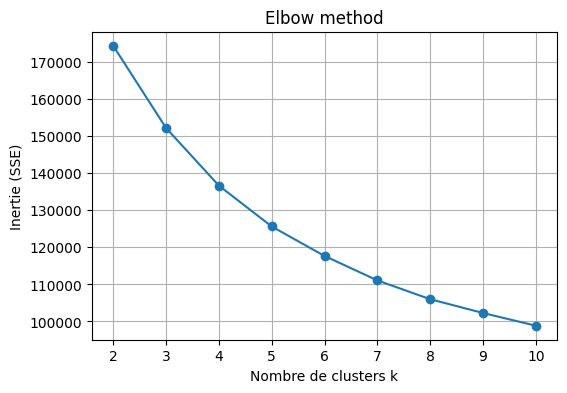

In [7]:
from sklearn.cluster import KMeans
# Elbow method pour déterminer le nombre optimal de clusters

inertias = []
K = range(2, 11)  # on teste de 2 à 10 clusters

for k in K:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X_train)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertias, marker='o')
plt.title("Elbow method")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie (SSE)")
plt.grid(True)
plt.show()


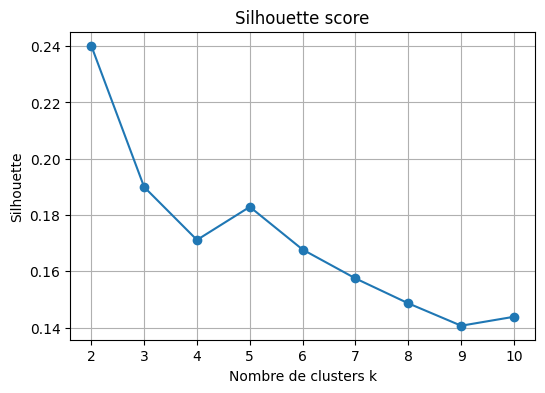

In [5]:
from sklearn.metrics import silhouette_score

silhouettes = []

for k in K:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouettes.append(score)

plt.figure(figsize=(6,4))
plt.plot(K, silhouettes, marker='o')
plt.title("Silhouette score")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette")
plt.grid(True)
plt.show()


In [6]:
best_k = K[silhouettes.index(max(silhouettes))]
print(f"Meilleur k selon silhouette = {best_k}")


Meilleur k selon silhouette = 2


In [8]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor


#regressor = LinearRegression().fit(X_train, y_train)
#randomForest=RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
k=2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_train)

In [9]:
df = df.copy()
df["cluster"] = labels

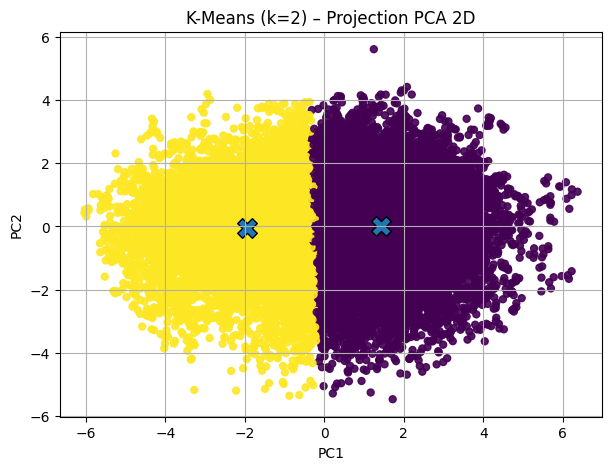

In [10]:
from sklearn.decomposition import PCA


# 3) Projection 2D pour visualiser (PCA)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_train)
centroids_2d = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(7,5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=25, alpha=0.9)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker="X", s=200, edgecolor="k", linewidth=1.0)
plt.title(f"K-Means (k={k}) – Projection PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 4) Récap 

In [11]:
# 4) Récap rapide des clusters
print("Taille de chaque cluster :")
print(df["cluster"].value_counts().sort_index())

print("\nProfil moyen par cluster :")
cluster_profile = df.groupby("cluster")[features].mean().round(1)
display(cluster_profile)


Taille de chaque cluster :
cluster
0    13952
1    10210
Name: count, dtype: int64

Profil moyen par cluster :


,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,weak_foot,skill_moves
cluster,,,,,,,,,,
0,178.0,72.5,74.3,64.5,66.7,72.2,50.9,66.3,3.3,3.1
1,184.9,78.6,62.2,45.1,54.4,57.5,62.4,71.6,2.8,2.1


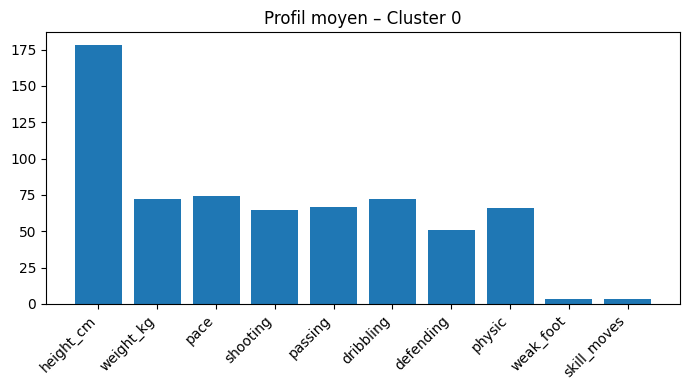

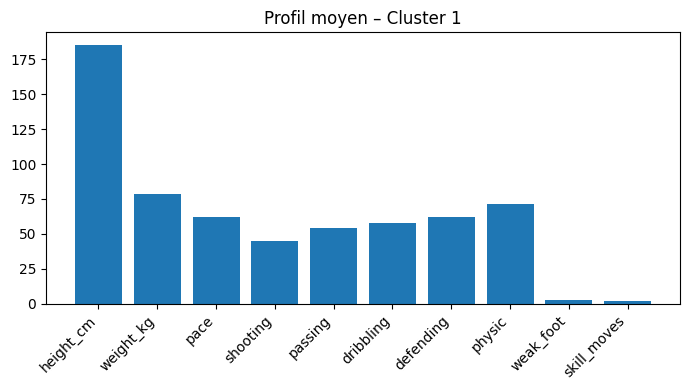

In [12]:

# 5) Barplot simple du profil moyen de chaque cluster (optionnel)
for c in cluster_profile.index:
    plt.figure(figsize=(7,4))
    vals = cluster_profile.loc[c].values
    plt.bar(features, vals)
    plt.title(f"Profil moyen – Cluster {c}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()